In [1]:
# Kütüphanleri import edelim
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import time
import lightgbm as lgb
import warnings
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sub_df=pd.read_csv("submission.csv")
df=pd.concat([train,test],sort=False)

In [3]:
train.head()

,KESİNTİ_NO,İL,İLÇE,ŞEBEKE_UNSURU,ŞEBEKE_UNSURU_KODU,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,KAYNAĞA_GÖRE,SÜREYE_GÖRE,SEBEBE_GÖRE,BİLDİRİME_GÖRE,BAŞLAMA_TARİHİ_VE_ZAMANI,SONA_ERME_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,KOD_NO,KADEME,OutageID,cagri_count
0,2279970,İZMİR,URLA,OG Fideri,TR-129 35-19-L00129_DIREK TIPI TRAFO HUCRESI H...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,11.04.2022 07:06:48,11.04.2022 10:11:11,3.073056,1,146,0,0,0,0,3.073056,448.666111,0.0,0.0,0.0,0.0,0.0,0.0,2279970,0.0
1,2228825,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,30.01.2022 20:27:00,31.01.2022 01:32:04,5.084444,3,1613,0,0,0,0,15.253333,8201.208888,0.0,0.0,0.0,0.0,0.0,0.0,2228825,153.0
2,2228866,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,31.01.2022 03:47:00,31.01.2022 05:30:45,1.729167,3,1613,0,0,0,0,5.187500,2789.145832,0.0,0.0,0.0,0.0,0.0,0.0,2228866,8.0
3,2272136,İZMİR,KARABAĞLAR,TM Fideri,UZUNDERE TM 35-01-A00013_İKİZTEPE M10_2034358,OG Yeraltı Kablo Arızası,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,31.03.2022 16:34:23,31.03.2022 17:21:07,0.778889,6,1556,0,0,0,0,4.673333,1211.951110,0.0,0.0,0.0,0.0,0.0,0.0,2272136,0.0
4,2310105,İZMİR,BERGAMA,OG Fideri,SİNDEL TR-1 35-16-M00029_DIREK TIPI TRAFO HUCR...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,03.06.2022 21:11:27,03.06.2022 22:44:57,1.558333,1,101,0,0,0,0,1.558333,157.391667,0.0,0.0,0.0,0.0,0.0,0.0,2310105,0.0


In [283]:
test.head()

,KESİNTİ_NO,İL,İLÇE,ŞEBEKE_UNSURU,ŞEBEKE_UNSURU_KODU,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,KAYNAĞA_GÖRE,SÜREYE_GÖRE,SEBEBE_GÖRE,BİLDİRİME_GÖRE,BAŞLAMA_TARİHİ_VE_ZAMANI,SONA_ERME_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,KADEME,OutageID
0,2342571,İZMİR,BORNOVA,OG Fideri,M-331 35-02-M00331_M-429 M02_2034177,Manevra,Dağıtım-OG,Kısa,Şebeke işletmecisi,Bildirimsiz,09.07.2022 22:49:22,09.07.2022 22:50:55,0.025833,16,178,0,0,0,0,0.413333,4.598333,0.000000,0.000000,0.0,0.0,1.0,2342571
1,2361468,İZMİR,BORNOVA,OG Fideri,M-331 35-02-M00331_M-429 M02_2034177,OG Kesici Arızası,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,13.08.2022 13:24:14,13.08.2022 14:15:21,0.851944,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,2361468
2,2361553,İZMİR,BORNOVA,OG Fideri,M-331 35-02-M00331_M-429 M02_2034177,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,13.08.2022 16:44:49,13.08.2022 17:35:59,0.852778,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,2361553
3,2334266,İZMİR,URLA,OG Fideri,TR-132 35-19-L00132_DIREK TIPI TRAFO HUCRESI H...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,26.06.2022 07:49:06,26.06.2022 09:33:18,1.736667,1,46,0,0,0,0,1.736667,79.886667,0.000000,0.000000,0.0,0.0,1.0,2334266
4,2366079,İZMİR,ÇEŞME,OG Fideri,L-474 35-18-L00474_DIREK TIPI TRAFO HUCRESI H0...,OG Ayırıcı Arızası,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,21.08.2022 17:12:03,21.08.2022 17:33:00,0.349167,0,0,1,65,0,0,0.000000,0.000000,0.349167,22.695833,0.0,0.0,1.0,2366079


In [284]:
df.set_index("KESİNTİ_NO",inplace=True)

In [285]:
train[train.cagri_count==0].shape

(31118, 29)

In [286]:
train[train.cagri_count!=0].shape

(74274, 29)

In [287]:
df.head()

,İL,İLÇE,ŞEBEKE_UNSURU,ŞEBEKE_UNSURU_KODU,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,KAYNAĞA_GÖRE,SÜREYE_GÖRE,SEBEBE_GÖRE,BİLDİRİME_GÖRE,BAŞLAMA_TARİHİ_VE_ZAMANI,SONA_ERME_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,KOD_NO,KADEME,OutageID,cagri_count
KESİNTİ_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2279970,İZMİR,URLA,OG Fideri,TR-129 35-19-L00129_DIREK TIPI TRAFO HUCRESI H...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,11.04.2022 07:06:48,11.04.2022 10:11:11,3.073056,1,146,0,0,0,0,3.073056,448.666111,0.0,0.0,0.0,0.0,0.0,0.0,2279970,0.0
2228825,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,30.01.2022 20:27:00,31.01.2022 01:32:04,5.084444,3,1613,0,0,0,0,15.253333,8201.208888,0.0,0.0,0.0,0.0,0.0,0.0,2228825,153.0
2228866,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,31.01.2022 03:47:00,31.01.2022 05:30:45,1.729167,3,1613,0,0,0,0,5.187500,2789.145832,0.0,0.0,0.0,0.0,0.0,0.0,2228866,8.0
2272136,İZMİR,KARABAĞLAR,TM Fideri,UZUNDERE TM 35-01-A00013_İKİZTEPE M10_2034358,OG Yeraltı Kablo Arızası,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,31.03.2022 16:34:23,31.03.2022 17:21:07,0.778889,6,1556,0,0,0,0,4.673333,1211.951110,0.0,0.0,0.0,0.0,0.0,0.0,2272136,0.0
2310105,İZMİR,BERGAMA,OG Fideri,SİNDEL TR-1 35-16-M00029_DIREK TIPI TRAFO HUCR...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,03.06.2022 21:11:27,03.06.2022 22:44:57,1.558333,1,101,0,0,0,0,1.558333,157.391667,0.0,0.0,0.0,0.0,0.0,0.0,2310105,0.0


# Time Series with ML

In [288]:
df["BAŞLAMA_TARİHİ_VE_ZAMANI"]=pd.to_datetime(df["BAŞLAMA_TARİHİ_VE_ZAMANI"],dayfirst=True)

In [84]:
# Seasonality
df["month"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.month
df["day_of_month"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.day
df["day_of_year"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.dayofyear
df["week_of_year"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.weekofyear
df["day_of_week"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.dayofweek
df["year"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.year
df["is_wknd"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.weekday
df["is_month_start"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.is_month_start.astype(int)
df["is_month_end"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.is_month_end.astype(int)
df["hour"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.hour
df["min"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.minute
df["sec"]=df.BAŞLAMA_TARİHİ_VE_ZAMANI.dt.second

In [289]:
df.head()

,İL,İLÇE,ŞEBEKE_UNSURU,ŞEBEKE_UNSURU_KODU,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA,KAYNAĞA_GÖRE,SÜREYE_GÖRE,SEBEBE_GÖRE,BİLDİRİME_GÖRE,BAŞLAMA_TARİHİ_VE_ZAMANI,SONA_ERME_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,KOD_NO,KADEME,OutageID,cagri_count
KESİNTİ_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2279970,İZMİR,URLA,OG Fideri,TR-129 35-19-L00129_DIREK TIPI TRAFO HUCRESI H...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,2022-04-11 07:06:48,11.04.2022 10:11:11,3.073056,1,146,0,0,0,0,3.073056,448.666111,0.0,0.0,0.0,0.0,0.0,0.0,2279970,0.0
2228825,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,2022-01-30 20:27:00,31.01.2022 01:32:04,5.084444,3,1613,0,0,0,0,15.253333,8201.208888,0.0,0.0,0.0,0.0,0.0,0.0,2228825,153.0
2228866,İZMİR,BORNOVA,OG Fideri,K-633 35-02-K00633_K-259 K01_2034347,OG Fider Açması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,2022-01-31 03:47:00,31.01.2022 05:30:45,1.729167,3,1613,0,0,0,0,5.187500,2789.145832,0.0,0.0,0.0,0.0,0.0,0.0,2228866,8.0
2272136,İZMİR,KARABAĞLAR,TM Fideri,UZUNDERE TM 35-01-A00013_İKİZTEPE M10_2034358,OG Yeraltı Kablo Arızası,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,2022-03-31 16:34:23,31.03.2022 17:21:07,0.778889,6,1556,0,0,0,0,4.673333,1211.951110,0.0,0.0,0.0,0.0,0.0,0.0,2272136,0.0
2310105,İZMİR,BERGAMA,OG Fideri,SİNDEL TR-1 35-16-M00029_DIREK TIPI TRAFO HUCR...,OG Sigorta Atması,Dağıtım-OG,Uzun,Şebeke işletmecisi,Bildirimsiz,2022-06-03 21:11:27,03.06.2022 22:44:57,1.558333,1,101,0,0,0,0,1.558333,157.391667,0.0,0.0,0.0,0.0,0.0,0.0,2310105,0.0


# Data Prep.

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [291]:
one_hot_cols=["İL","İLÇE","ŞEBEKE_UNSURU","KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA","KAYNAĞA_GÖRE","SÜREYE_GÖRE","SEBEBE_GÖRE"]
df=pd.get_dummies(df,columns=one_hot_cols,drop_first=True)

In [292]:
df.head()

,ŞEBEKE_UNSURU_KODU,BİLDİRİME_GÖRE,BAŞLAMA_TARİHİ_VE_ZAMANI,SONA_ERME_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,KOD_NO,KADEME,OutageID,cagri_count,İL_İZMİR,İLÇE_AKHİSAR,İLÇE_ALAŞEHİR,İLÇE_ALİAĞA,İLÇE_BALÇOVA,İLÇE_BAYINDIR,İLÇE_BAYRAKLI,İLÇE_BERGAMA,İLÇE_BEYDAĞ,İLÇE_BORNOVA,İLÇE_BUCA,İLÇE_DEMİRCİ,İLÇE_DİKİLİ,İLÇE_FOÇA,İLÇE_GAZİEMİR,İLÇE_GÖLMARMARA,İLÇE_GÖRDES,İLÇE_GÜZELBAHÇE,İLÇE_KARABAĞLAR,İLÇE_KARABURUN,İLÇE_KARŞIYAKA,İLÇE_KEMALPAŞA,İLÇE_KINIK,İLÇE_KIRKAĞAÇ,İLÇE_KONAK,İLÇE_KULA,İLÇE_KÖPRÜBAŞI,İLÇE_KİRAZ,İLÇE_MENDERES,İLÇE_MENEMEN,İLÇE_NARLIDERE,İLÇE_SALİHLİ,İLÇE_SARIGÖL,İLÇE_SARUHANLI,İLÇE_SEFERİHİSAR,İLÇE_SELENDİ,İLÇE_SELÇUK,İLÇE_SOMA,İLÇE_TORBALI,İLÇE_TURGUTLU,İLÇE_TİRE,İLÇE_URLA,İLÇE_YUNUSEMRE,İLÇE_ÇEŞME,İLÇE_ÇİĞLİ,İLÇE_ÖDEMİŞ,İLÇE_ŞEHZADELER,ŞEBEKE_UNSURU_Abone Tesisi,ŞEBEKE_UNSURU_DM,ŞEBEKE_UNSURU_Dağıtım Transformatörü,ŞEBEKE_UNSURU_KÖK,ŞEBEKE_UNSURU_OG Fideri,ŞEBEKE_UNSURU_Saha Dağıtım Kutusu (SDK),ŞEBEKE_UNSURU_TM Fideri,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Tel Kopuğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Termik Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Voltaj Düşüklüğü,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yük Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_EİH Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Fiziki İrtibat,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Hırsızlık,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Manevra,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Müteahhit Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_NH Altlık Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama(Jumper) Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Direk Yıkılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Fider Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kesici Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Parafudr Patlaması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Sigorta Atması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIK

In [293]:
df.drop(["ŞEBEKE_UNSURU_KODU","BİLDİRİME_GÖRE","SONA_ERME_TARİHİ_VE_ZAMANI","KOD_NO","KADEME","OutageID"],axis=1,inplace=True)

In [294]:
df.head()

,BAŞLAMA_TARİHİ_VE_ZAMANI,KESİNTİ_SÜRESİ,KENTSEL_OG,KENTSEL_AG,KENTALTI_OG,KENTALTI_AG,KIRSAL_OG,KIRSAL_AG,TOPLAM_KENTSEL_OG,TOPLAM_KENTSEL_AG,TOPLAM_KENTALTI_OG,TOPLAM_KENTALTI_AG,TOPLAM_KIRSAL_OG,TOPLAM_KIRSAL_AG,cagri_count,İL_İZMİR,İLÇE_AKHİSAR,İLÇE_ALAŞEHİR,İLÇE_ALİAĞA,İLÇE_BALÇOVA,İLÇE_BAYINDIR,İLÇE_BAYRAKLI,İLÇE_BERGAMA,İLÇE_BEYDAĞ,İLÇE_BORNOVA,İLÇE_BUCA,İLÇE_DEMİRCİ,İLÇE_DİKİLİ,İLÇE_FOÇA,İLÇE_GAZİEMİR,İLÇE_GÖLMARMARA,İLÇE_GÖRDES,İLÇE_GÜZELBAHÇE,İLÇE_KARABAĞLAR,İLÇE_KARABURUN,İLÇE_KARŞIYAKA,İLÇE_KEMALPAŞA,İLÇE_KINIK,İLÇE_KIRKAĞAÇ,İLÇE_KONAK,İLÇE_KULA,İLÇE_KÖPRÜBAŞI,İLÇE_KİRAZ,İLÇE_MENDERES,İLÇE_MENEMEN,İLÇE_NARLIDERE,İLÇE_SALİHLİ,İLÇE_SARIGÖL,İLÇE_SARUHANLI,İLÇE_SEFERİHİSAR,İLÇE_SELENDİ,İLÇE_SELÇUK,İLÇE_SOMA,İLÇE_TORBALI,İLÇE_TURGUTLU,İLÇE_TİRE,İLÇE_URLA,İLÇE_YUNUSEMRE,İLÇE_ÇEŞME,İLÇE_ÇİĞLİ,İLÇE_ÖDEMİŞ,İLÇE_ŞEHZADELER,ŞEBEKE_UNSURU_Abone Tesisi,ŞEBEKE_UNSURU_DM,ŞEBEKE_UNSURU_Dağıtım Transformatörü,ŞEBEKE_UNSURU_KÖK,ŞEBEKE_UNSURU_OG Fideri,ŞEBEKE_UNSURU_Saha Dağıtım Kutusu (SDK),ŞEBEKE_UNSURU_TM Fideri,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Tel Kopuğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Termik Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Voltaj Düşüklüğü,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yük Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_EİH Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Fiziki İrtibat,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Hırsızlık,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Manevra,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Müteahhit Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_NH Altlık Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama(Jumper) Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Direk Yıkılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Fider Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kesici Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Parafudr Patlaması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Sigorta Atması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İzolatör Arızası,KESİNT

# PCA

In [295]:
new_df=df.copy()

In [296]:
new_df=new_df.reset_index()

In [297]:
new_df.drop("KESİNTİ_NO",axis=1,inplace=True)

In [298]:
new_df.drop("cagri_count",axis=1,inplace=True)

In [299]:
new_df.drop("BAŞLAMA_TARİHİ_VE_ZAMANI",axis=1,inplace=True)

In [300]:
num_cols=["KESİNTİ_SÜRESİ","KENTSEL_OG","KENTSEL_AG","KENTALTI_OG","KENTALTI_AG","KIRSAL_OG","KIRSAL_AG","TOPLAM_KENTSEL_OG","TOPLAM_KENTSEL_AG","TOPLAM_KENTALTI_OG","TOPLAM_KENTALTI_AG","TOPLAM_KIRSAL_OG","TOPLAM_KIRSAL_AG"]

In [301]:
cat_cols=[col for col in new_df.columns if col not in num_cols]

In [302]:
new_df=StandardScaler().fit_transform(new_df[num_cols])

In [303]:
pca=PCA()
pca_fit=pca.fit_transform(new_df)

In [304]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.26914419, 0.43408165, 0.53869672, 0.63907517, 0.71622276,
       0.78710138, 0.84794867, 0.88854234, 0.92450603, 0.95240248,
       0.97266537, 0.99008628, 1.        ])

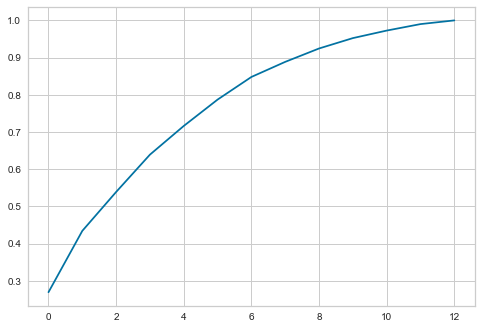

In [305]:
# Optimum bileşen sayısı
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [308]:
# Final PCA
pca=PCA(n_components=9)
pca_fit=pca.fit_transform(new_df)

In [309]:
np.cumsum(pca.explained_variance_ratio_)

array([0.26914419, 0.43408165, 0.53869672, 0.63907517, 0.71622276,
       0.78710138, 0.84794867, 0.88854234, 0.92450603])

In [310]:
new_df=pd.DataFrame(pca_fit)

# Clusterıng

In [311]:
sc=MinMaxScaler((0,1))
new_df=sc.fit_transform(new_df)
new_df

array([[0.00769609, 0.24435703, 0.46423501, ..., 0.40789664, 0.27767885,
        0.34586674],
       [0.00917106, 0.25768737, 0.47186517, ..., 0.40347421, 0.29613448,
        0.34116936],
       [0.00847334, 0.25017079, 0.46863712, ..., 0.40708283, 0.28269679,
        0.34551932],
       ...,
       [0.00768428, 0.24357824, 0.46452083, ..., 0.40889519, 0.27827853,
        0.34627904],
       [0.00759891, 0.24343075, 0.4639858 , ..., 0.40833202, 0.27714917,
        0.34616799],
       [0.00768372, 0.24357706, 0.46451704, ..., 0.40889124, 0.27827017,
        0.34627838]])

In [322]:
kmeans=KMeans(n_clusters=100).fit(new_df)
kmeans.labels_

array([ 0, 72, 79, ..., 39, 39, 39])

In [323]:
kmeans.inertia_

7.932517415659412

In [317]:
# Optimum Küme Sayısının Belirlenmesi
kmeans=KMeans()
ssd=[]
K=range(30,80)
for k in K:
  kmeans=KMeans(n_clusters=k).fit(new_df)
  ssd.append(kmeans.inertia_)

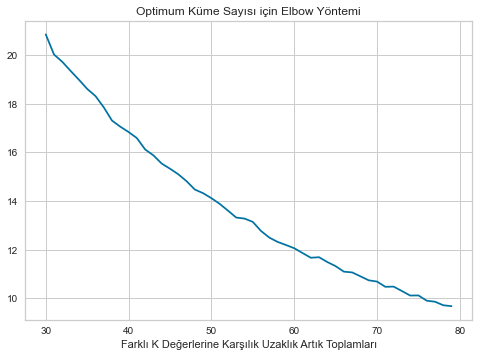

In [318]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show()

In [324]:
df["label"]=kmeans.labels_

In [326]:
df.drop(num_cols,axis=1,inplace=True)

In [327]:
df.head()

,BAŞLAMA_TARİHİ_VE_ZAMANI,cagri_count,İL_İZMİR,İLÇE_AKHİSAR,İLÇE_ALAŞEHİR,İLÇE_ALİAĞA,İLÇE_BALÇOVA,İLÇE_BAYINDIR,İLÇE_BAYRAKLI,İLÇE_BERGAMA,İLÇE_BEYDAĞ,İLÇE_BORNOVA,İLÇE_BUCA,İLÇE_DEMİRCİ,İLÇE_DİKİLİ,İLÇE_FOÇA,İLÇE_GAZİEMİR,İLÇE_GÖLMARMARA,İLÇE_GÖRDES,İLÇE_GÜZELBAHÇE,İLÇE_KARABAĞLAR,İLÇE_KARABURUN,İLÇE_KARŞIYAKA,İLÇE_KEMALPAŞA,İLÇE_KINIK,İLÇE_KIRKAĞAÇ,İLÇE_KONAK,İLÇE_KULA,İLÇE_KÖPRÜBAŞI,İLÇE_KİRAZ,İLÇE_MENDERES,İLÇE_MENEMEN,İLÇE_NARLIDERE,İLÇE_SALİHLİ,İLÇE_SARIGÖL,İLÇE_SARUHANLI,İLÇE_SEFERİHİSAR,İLÇE_SELENDİ,İLÇE_SELÇUK,İLÇE_SOMA,İLÇE_TORBALI,İLÇE_TURGUTLU,İLÇE_TİRE,İLÇE_URLA,İLÇE_YUNUSEMRE,İLÇE_ÇEŞME,İLÇE_ÇİĞLİ,İLÇE_ÖDEMİŞ,İLÇE_ŞEHZADELER,ŞEBEKE_UNSURU_Abone Tesisi,ŞEBEKE_UNSURU_DM,ŞEBEKE_UNSURU_Dağıtım Transformatörü,ŞEBEKE_UNSURU_KÖK,ŞEBEKE_UNSURU_OG Fideri,ŞEBEKE_UNSURU_Saha Dağıtım Kutusu (SDK),ŞEBEKE_UNSURU_TM Fideri,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Tel Kopuğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Termik Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Voltaj Düşüklüğü,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yük Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_EİH Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Fiziki İrtibat,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Hırsızlık,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Manevra,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Müteahhit Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_NH Altlık Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama(Jumper) Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Direk Yıkılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Fider Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kesici Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Parafudr Patlaması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Sigorta Atması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Plansız Kesinti / Müdahale,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_TEİAŞ Hat Bakım Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_TEİAŞ Trafo Arızası,KESİNTİ_NEDENİNE_İLİ

# Time Series with Facebook Prophet

In [328]:
# Setup
!pip install prophet

In [329]:
# İmport
from prophet import Prophet

In [330]:
# Protect data
new_df=df.copy()

In [332]:
# Process data
new_df.head()
new_df["BAŞLAMA_TARİHİ_VE_ZAMANI"]=pd.to_datetime(new_df["BAŞLAMA_TARİHİ_VE_ZAMANI"],dayfirst=True)

In [333]:
new_df.sort_values(by=["BAŞLAMA_TARİHİ_VE_ZAMANI"],axis=0,inplace=True)

In [334]:
new_df.head()

,BAŞLAMA_TARİHİ_VE_ZAMANI,cagri_count,İL_İZMİR,İLÇE_AKHİSAR,İLÇE_ALAŞEHİR,İLÇE_ALİAĞA,İLÇE_BALÇOVA,İLÇE_BAYINDIR,İLÇE_BAYRAKLI,İLÇE_BERGAMA,İLÇE_BEYDAĞ,İLÇE_BORNOVA,İLÇE_BUCA,İLÇE_DEMİRCİ,İLÇE_DİKİLİ,İLÇE_FOÇA,İLÇE_GAZİEMİR,İLÇE_GÖLMARMARA,İLÇE_GÖRDES,İLÇE_GÜZELBAHÇE,İLÇE_KARABAĞLAR,İLÇE_KARABURUN,İLÇE_KARŞIYAKA,İLÇE_KEMALPAŞA,İLÇE_KINIK,İLÇE_KIRKAĞAÇ,İLÇE_KONAK,İLÇE_KULA,İLÇE_KÖPRÜBAŞI,İLÇE_KİRAZ,İLÇE_MENDERES,İLÇE_MENEMEN,İLÇE_NARLIDERE,İLÇE_SALİHLİ,İLÇE_SARIGÖL,İLÇE_SARUHANLI,İLÇE_SEFERİHİSAR,İLÇE_SELENDİ,İLÇE_SELÇUK,İLÇE_SOMA,İLÇE_TORBALI,İLÇE_TURGUTLU,İLÇE_TİRE,İLÇE_URLA,İLÇE_YUNUSEMRE,İLÇE_ÇEŞME,İLÇE_ÇİĞLİ,İLÇE_ÖDEMİŞ,İLÇE_ŞEHZADELER,ŞEBEKE_UNSURU_Abone Tesisi,ŞEBEKE_UNSURU_DM,ŞEBEKE_UNSURU_Dağıtım Transformatörü,ŞEBEKE_UNSURU_KÖK,ŞEBEKE_UNSURU_OG Fideri,ŞEBEKE_UNSURU_Saha Dağıtım Kutusu (SDK),ŞEBEKE_UNSURU_TM Fideri,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Tel Kopuğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Termik Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Voltaj Düşüklüğü,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Yük Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_EİH Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Fiziki İrtibat,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Hırsızlık,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Manevra,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Müteahhit Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_NH Altlık Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Atlama(Jumper) Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Ayırıcı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Direk Yıkılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Fider Açması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Kesici Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Parafudr Patlaması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Sigorta Atması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Trafo Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Travers Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_OG İzolatör Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_Plansız Kesinti / Müdahale,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_TEİAŞ Hat Bakım Çalışması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_TEİAŞ Trafo Arızası,KESİNTİ_NEDENİNE_İLİ

In [92]:
#new_df=new_df.loc[(new_df["İL"]=="MANİSA"),:]

In [335]:
#new_df=new_df[["BAŞLAMA_TARİHİ_VE_ZAMANI","cagri_count"]]
new_df.rename(columns={"BAŞLAMA_TARİHİ_VE_ZAMANI":"ds","cagri_count":"y"},inplace=True)

In [337]:
reg_list=[col for col in new_df.columns if col not in ["y","ds"]]

In [500]:
train=new_df[~new_df["y"].isna()]
test=new_df[new_df["y"].isna()]

In [501]:
res_train=train.copy()
res_test=test.copy()

In [502]:
test.drop(["y"],axis=1,inplace=True)

In [526]:
m=Prophet(changepoint_prior_scale=0.1,interval_width=0.95,daily_seasonality=True)
for name in reg_list:
    m.add_regressor(name,standardize = "auto")
#standardize = "auto"
m.fit(train[train["label"]==90])
fcst=m.predict(train[train["label"]==90])

02:13:36 - cmdstanpy - INFO - Chain [1] start processing
02:15:13 - cmdstanpy - INFO - Chain [1] done processing


In [527]:
train[train.label==90].y.tail(7)

KESİNTİ_NO
2275413    0.0
2277987    0.0
2279833    0.0
2288711    0.0
2298661    0.0
2311282    0.0
2311599    0.0
Name: y, dtype: float64

In [529]:
fcst.yhat.tail(7)

16   -0.000903
17   -0.001347
18   -0.000036
19   -0.000220
20    0.000619
21    0.002687
22   -0.000033
Name: yhat, dtype: float64

In [525]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,KAYNAĞA_GÖRE_Dağıtım-OG,KAYNAĞA_GÖRE_Dağıtım-OG_lower,KAYNAĞA_GÖRE_Dağıtım-OG_upper,KAYNAĞA_GÖRE_İletim,KAYNAĞA_GÖRE_İletim_lower,KAYNAĞA_GÖRE_İletim_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Faz Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Abone Çıkış Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Faz Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box / Sdk Giriş Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Box Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Branşman Yeraltı Kablo Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Değişimi_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direk Kırılması_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Direkten Kesme Açma_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Ağaç Kesimi_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Hatta Yabancı Cisim_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Havai Branşman Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kablo Başlığı Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Kademe Ayarı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Klemens Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Nötr İletken Kopması_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Arızası_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Faz Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Pano Kol Sigorta Atığı_upper,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu_lower,KESİNTİ_NEDENİNE_İLİŞKİN_AÇIKLAMA_AG Sehim Bozukluğu_upper,KE

In [477]:
for i in range(0,100):
    m=Prophet(changepoint_prior_scale=0.1,interval_width=0.95,daily_seasonality=True)
    for name in reg_list:
        m.add_regressor(name)
    try:
        m.fit(train[train["label"]==i])
        fcst=m.predict(test[test["label"]==i])
        res_test.loc[res_test.label==i,"y"]=fcst["yhat"].values
    except:
        print(i)
        pass

01:23:19 - cmdstanpy - INFO - Chain [1] start processing
01:23:38 - cmdstanpy - INFO - Chain [1] done processing
01:23:39 - cmdstanpy - INFO - Chain [1] start processing
01:23:39 - cmdstanpy - INFO - Chain [1] done processing
01:23:40 - cmdstanpy - INFO - Chain [1] start processing
01:25:13 - cmdstanpy - INFO - Chain [1] done processing
01:25:13 - cmdstanpy - INFO - Chain [1] start processing
01:25:30 - cmdstanpy - INFO - Chain [1] done processing
01:25:31 - cmdstanpy - INFO - Chain [1] start processing
01:25:32 - cmdstanpy - INFO - Chain [1] done processing
01:25:32 - cmdstanpy - INFO - Chain [1] start processing


5


01:25:32 - cmdstanpy - INFO - Chain [1] done processing
01:25:33 - cmdstanpy - INFO - Chain [1] start processing
01:25:36 - cmdstanpy - INFO - Chain [1] done processing
01:25:37 - cmdstanpy - INFO - Chain [1] start processing
01:26:49 - cmdstanpy - INFO - Chain [1] done processing
01:26:50 - cmdstanpy - INFO - Chain [1] start processing
01:26:50 - cmdstanpy - INFO - Chain [1] done processing
01:26:51 - cmdstanpy - INFO - Chain [1] start processing
01:26:52 - cmdstanpy - INFO - Chain [1] done processing
01:26:53 - cmdstanpy - INFO - Chain [1] start processing
01:26:53 - cmdstanpy - INFO - Chain [1] done processing
01:26:54 - cmdstanpy - INFO - Chain [1] start processing
01:27:08 - cmdstanpy - INFO - Chain [1] done processing
01:27:09 - cmdstanpy - INFO - Chain [1] start processing
01:27:09 - cmdstanpy - INFO - Chain [1] done processing
01:27:10 - cmdstanpy - INFO - Chain [1] start processing
01:27:10 - cmdstanpy - INFO - Chain [1] done processing
01:27:11 - cmdstanpy - INFO - Chain [1] 

19


01:28:16 - cmdstanpy - INFO - Chain [1] start processing
01:29:53 - cmdstanpy - INFO - Chain [1] done processing
01:29:54 - cmdstanpy - INFO - Chain [1] start processing
01:29:54 - cmdstanpy - INFO - Chain [1] done processing
01:29:55 - cmdstanpy - INFO - Chain [1] start processing
01:29:55 - cmdstanpy - INFO - Chain [1] done processing


22
23


01:29:56 - cmdstanpy - INFO - Chain [1] start processing
01:29:58 - cmdstanpy - INFO - Chain [1] done processing
01:29:58 - cmdstanpy - INFO - Chain [1] start processing
01:30:00 - cmdstanpy - INFO - Chain [1] done processing


26


01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:17 - cmdstanpy - INFO - Chain [1] done processing
01:30:19 - cmdstanpy - INFO - Chain [1] start processing
01:30:20 - cmdstanpy - INFO - Chain [1] done processing
01:30:21 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing


29
30
31


01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing
01:30:24 - cmdstanpy - INFO - Chain [1] start processing
01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:33 - cmdstanpy - INFO - Chain [1] start processing
01:32:34 - cmdstanpy - INFO - Chain [1] done processing
01:32:34 - cmdstanpy - INFO - Chain [1] start processing
01:32:34 - cmdstanpy - INFO - Chain [1] done processing
01:32:35 - cmdstanpy - INFO - Chain [1] start processing
01:34:19 - cmdstanpy - INFO - Chain [1] done processing


37
38


01:34:21 - cmdstanpy - INFO - Chain [1] start processing
01:35:06 - cmdstanpy - INFO - Chain [1] done processing
01:35:08 - cmdstanpy - INFO - Chain [1] start processing
01:35:08 - cmdstanpy - INFO - Chain [1] done processing
01:35:09 - cmdstanpy - INFO - Chain [1] start processing
01:35:09 - cmdstanpy - INFO - Chain [1] done processing
01:35:10 - cmdstanpy - INFO - Chain [1] start processing
01:35:10 - cmdstanpy - INFO - Chain [1] done processing
01:35:11 - cmdstanpy - INFO - Chain [1] start processing
01:35:11 - cmdstanpy - INFO - Chain [1] done processing
01:35:12 - cmdstanpy - INFO - Chain [1] start processing
01:35:13 - cmdstanpy - INFO - Chain [1] done processing
01:35:14 - cmdstanpy - INFO - Chain [1] start processing
01:37:13 - cmdstanpy - INFO - Chain [1] done processing


46


01:37:14 - cmdstanpy - INFO - Chain [1] start processing
01:37:15 - cmdstanpy - INFO - Chain [1] done processing
01:37:16 - cmdstanpy - INFO - Chain [1] start processing
01:37:17 - cmdstanpy - INFO - Chain [1] done processing
01:37:18 - cmdstanpy - INFO - Chain [1] start processing
01:37:28 - cmdstanpy - INFO - Chain [1] done processing


50


01:37:29 - cmdstanpy - INFO - Chain [1] start processing
01:37:30 - cmdstanpy - INFO - Chain [1] done processing


52


01:37:30 - cmdstanpy - INFO - Chain [1] start processing
01:38:03 - cmdstanpy - INFO - Chain [1] done processing
01:38:04 - cmdstanpy - INFO - Chain [1] start processing
01:38:04 - cmdstanpy - INFO - Chain [1] done processing
01:38:05 - cmdstanpy - INFO - Chain [1] start processing
01:38:05 - cmdstanpy - INFO - Chain [1] done processing


56


01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:39:02 - cmdstanpy - INFO - Chain [1] done processing
01:39:02 - cmdstanpy - INFO - Chain [1] start processing
01:39:03 - cmdstanpy - INFO - Chain [1] done processing
01:39:03 - cmdstanpy - INFO - Chain [1] start processing
01:40:25 - cmdstanpy - INFO - Chain [1] done processing


60


01:40:26 - cmdstanpy - INFO - Chain [1] start processing
01:40:27 - cmdstanpy - INFO - Chain [1] done processing
01:40:28 - cmdstanpy - INFO - Chain [1] start processing


62


01:40:31 - cmdstanpy - INFO - Chain [1] done processing


63


01:40:31 - cmdstanpy - INFO - Chain [1] start processing
01:40:33 - cmdstanpy - INFO - Chain [1] done processing
01:40:34 - cmdstanpy - INFO - Chain [1] start processing
01:42:04 - cmdstanpy - INFO - Chain [1] done processing
01:42:04 - cmdstanpy - INFO - Chain [1] start processing
01:43:02 - cmdstanpy - INFO - Chain [1] done processing


67


01:43:03 - cmdstanpy - INFO - Chain [1] start processing
01:43:03 - cmdstanpy - INFO - Chain [1] done processing
01:43:04 - cmdstanpy - INFO - Chain [1] start processing
01:43:06 - cmdstanpy - INFO - Chain [1] done processing
01:43:07 - cmdstanpy - INFO - Chain [1] start processing
01:43:08 - cmdstanpy - INFO - Chain [1] done processing
01:43:09 - cmdstanpy - INFO - Chain [1] start processing
01:43:11 - cmdstanpy - INFO - Chain [1] done processing
01:43:12 - cmdstanpy - INFO - Chain [1] start processing
01:43:12 - cmdstanpy - INFO - Chain [1] done processing
01:43:13 - cmdstanpy - INFO - Chain [1] start processing
01:43:13 - cmdstanpy - INFO - Chain [1] done processing
01:43:14 - cmdstanpy - INFO - Chain [1] start processing
01:43:14 - cmdstanpy - INFO - Chain [1] done processing
01:43:15 - cmdstanpy - INFO - Chain [1] start processing
01:43:17 - cmdstanpy - INFO - Chain [1] done processing
01:43:17 - cmdstanpy - INFO - Chain [1] start processing
01:43:18 - cmdstanpy - INFO - Chain [1]

81


01:43:28 - cmdstanpy - INFO - Chain [1] start processing
01:43:41 - cmdstanpy - INFO - Chain [1] done processing
01:43:42 - cmdstanpy - INFO - Chain [1] start processing
01:45:24 - cmdstanpy - INFO - Chain [1] done processing


83


01:45:24 - cmdstanpy - INFO - Chain [1] start processing
01:45:25 - cmdstanpy - INFO - Chain [1] done processing


85


01:45:26 - cmdstanpy - INFO - Chain [1] start processing
01:45:44 - cmdstanpy - INFO - Chain [1] done processing


87


01:45:45 - cmdstanpy - INFO - Chain [1] start processing
01:45:48 - cmdstanpy - INFO - Chain [1] done processing
01:45:49 - cmdstanpy - INFO - Chain [1] start processing
01:47:19 - cmdstanpy - INFO - Chain [1] done processing
01:47:19 - cmdstanpy - INFO - Chain [1] start processing
01:48:59 - cmdstanpy - INFO - Chain [1] done processing
01:49:00 - cmdstanpy - INFO - Chain [1] start processing
01:49:01 - cmdstanpy - INFO - Chain [1] done processing
01:49:02 - cmdstanpy - INFO - Chain [1] start processing
01:49:02 - cmdstanpy - INFO - Chain [1] done processing
01:49:03 - cmdstanpy - INFO - Chain [1] start processing
01:49:04 - cmdstanpy - INFO - Chain [1] done processing


93
94


01:49:05 - cmdstanpy - INFO - Chain [1] start processing
01:49:06 - cmdstanpy - INFO - Chain [1] done processing


95


01:49:07 - cmdstanpy - INFO - Chain [1] start processing
01:49:11 - cmdstanpy - INFO - Chain [1] done processing
01:49:12 - cmdstanpy - INFO - Chain [1] start processing


97


01:49:13 - cmdstanpy - INFO - Chain [1] done processing


99


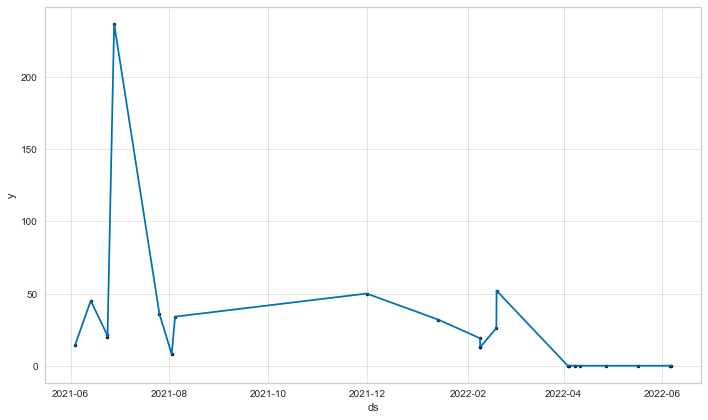

In [380]:
fcst=m.predict(train[train["label"]==90])
fig=m.plot(fcst)

In [486]:
y_pred=abs(res_test["y"].values)

In [490]:
sub_df["KESİNTİ_NO"]=res_test.index.values

In [491]:
sub_df["cagri_count"]=y_pred

In [492]:
sub_df.head()

,KESİNTİ_NO,cagri_count
0,2315833,0.846074
1,2315837,1.171019
2,2315843,1.621911
3,2315847,1.753674
4,2315846,4.880212


In [493]:
sub_df.to_csv("spl_one.csv",index=False)